# Validate candlestick patterns

In [47]:
from src import utils as u
import pandas as pd
import random
import mplfinance as mpf
import os
import numpy as np
import datetime

## Get the data

### Parameters

In [89]:
asset_ticket = "BTCUSDT"
timestamp = "15m"
start_date = "1 Jan, 2020"
end_date = "31 Dec, 2021"

In [90]:
input_data_path = '../data'
input_data_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_raw"
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [91]:
df = pd.read_csv(full_path_input_data)

In [92]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR,CDLENGULFING,CDLENGULFINGBULLISH,CDLENGULFINGBEARISH
0,1577836800000,7195.24,7196.25,7178.20,7180.97,202.942868,1577837699999,1.458245e+06,2452,76.962041,...,0,0,0,0,0,0,0,0,0,0
1,1577837700000,7180.97,7186.40,7175.47,7178.45,128.242654,1577838599999,9.207027e+05,1948,58.389110,...,0,0,0,0,0,0,0,0,0,0
2,1577838600000,7178.19,7185.44,7176.23,7179.56,83.487458,1577839499999,5.994792e+05,1580,43.822374,...,0,0,0,0,0,0,0,0,0,0
3,1577839500000,7179.35,7183.98,7175.46,7177.02,97.141921,1577840399999,6.974298e+05,1660,46.979601,...,0,0,0,0,0,0,0,0,0,0
4,1577840400000,7176.47,7194.04,7175.71,7190.86,103.520522,1577841299999,7.440891e+05,1588,56.251378,...,0,0,0,0,0,0,0,100,100,0


## Set the index on the dataframe

In [93]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

## Verify that the candlesticks are definitely showing a trend (down/up)

### Set some parameters

In [94]:
window_size = 50
slope_size = 7

### Get the dates from the bullish candlesticks patterns

In [95]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['formatted_open_time'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['formatted_open_time'].to_list()
list_dates_bullishengulfing = df[df['CDLENGULFINGBULLISH'] == 100]['formatted_open_time'].to_list()

In [96]:
list_all_dates = df['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [97]:
print(f'BEFORE: number of inverted hammer:{len(list_dates_invertedhammer)}')
print(f'BEFORE: number of hammer:{len(list_dates_hammer)}')
print(f'BEFORE: number of piercing:{len(list_dates_piercing)}')
print(f'BEFORE: number of morning star:{len(list_dates_morningstar)}')
print(f'BEFORE: number of bullish engulfing:{len(list_dates_bullishengulfing)}')

BEFORE: number of inverted hammer:337
BEFORE: number of hammer:1823
BEFORE: number of piercing:2
BEFORE: number of morning star:231
BEFORE: number of bullish engulfing:2701


#### Run the checks to identify the real candlesticks with reversal

In [98]:
list_validate_dates_invertedhammer = []
list_new_sign_invertedhammer = []
for date in list_dates_invertedhammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_invertedhammer.append(date)
        list_new_sign_invertedhammer.append(1)
    else:
        list_new_sign_invertedhammer.append(0)

In [99]:
list_validate_dates_hammer = []
list_new_sign_hammer = []
for date in list_dates_hammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_hammer.append(date)
        list_new_sign_hammer.append(1)
    else:
        list_new_sign_hammer.append(0)        

In [100]:
list_validate_dates_piercing = []
list_new_sign_piercing = []
for date in list_dates_piercing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_piercing.append(date)
        list_new_sign_piercing.append(1)
    else:
        list_new_sign_piercing.append(0)         

In [101]:
list_validate_dates_morningstar = []
list_new_sign_morningstar = []
for date in list_dates_morningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_morningstar.append(date)
        list_new_sign_morningstar.append(1)
    else:
        list_new_sign_morningstar.append(0)          

In [102]:
list_validate_dates_bullishengulfing = []
list_new_sign_bullishengulfing = []
for date in list_dates_bullishengulfing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_bullishengulfing.append(date)
        list_new_sign_bullishengulfing.append(1)
    else:
        list_new_sign_bullishengulfing.append(0)          

#### Get the amount of candlesticks patterns (after check)

In [103]:
print(f'AFTER: number of inverted hammer:{len(list_validate_dates_invertedhammer)}')
print(f'AFTER: number of hammer:{len(list_validate_dates_hammer)}')
print(f'AFTER: number of piercing:{len(list_validate_dates_piercing)}')
print(f'AFTER: number of morning star:{len(list_validate_dates_morningstar)}')
print(f'AFTER: number of bullish engulfing:{len(list_validate_dates_bullishengulfing)}')

AFTER: number of inverted hammer:10
AFTER: number of hammer:57
AFTER: number of piercing:0
AFTER: number of morning star:14
AFTER: number of bullish engulfing:129


### Plot some results

#### Inverted Hammer

6846


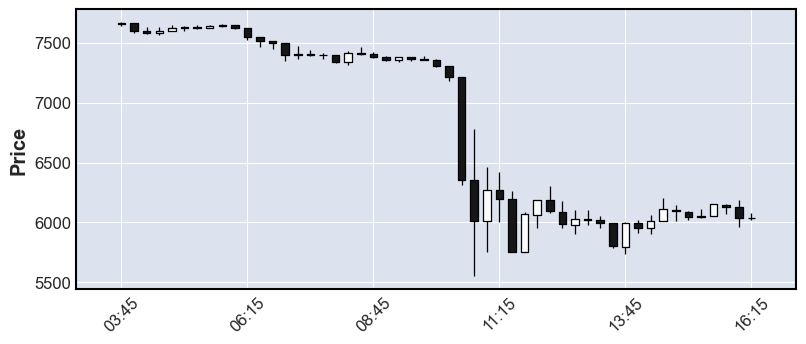

In [104]:
random_date = random.randint(0, len(list_validate_dates_invertedhammer)-1)
print(df.index.get_loc(list_validate_dates_invertedhammer[random_date]))
idx = df.index.get_loc(list_validate_dates_invertedhammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Hammer

24586


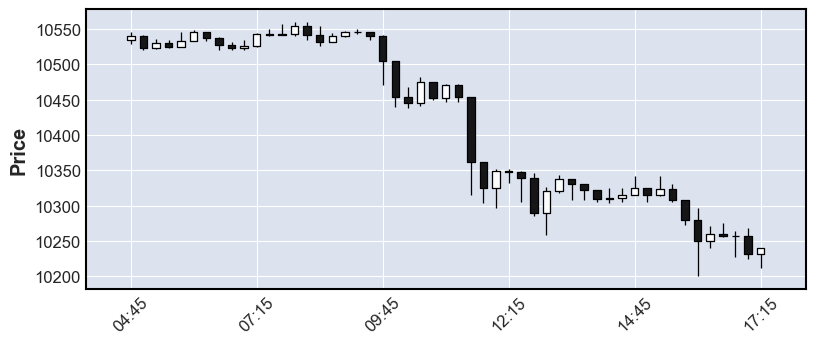

In [105]:
random_date = random.randint(0, len(list_validate_dates_hammer)-1)
print(df.index.get_loc(list_validate_dates_hammer[random_date]))
idx = df.index.get_loc(list_validate_dates_hammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Piercing

In [65]:
random_date = random.randint(0, len(list_validate_dates_piercing)-1)
print(df.index.get_loc(list_validate_dates_piercing[random_date]))
idx = df.index.get_loc(list_validate_dates_piercing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Morning Star

53066


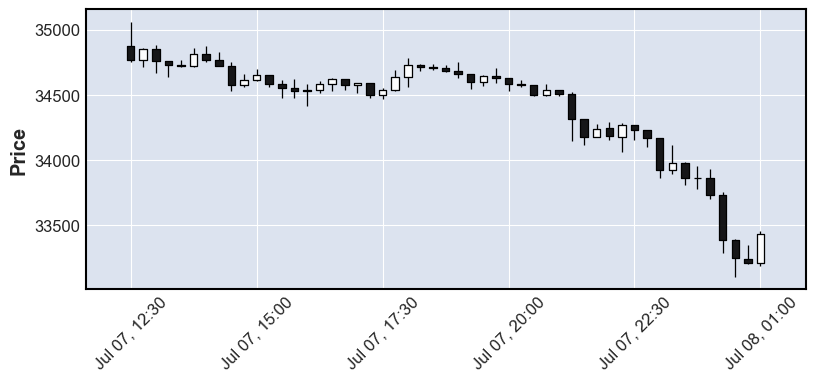

In [106]:
random_date = random.randint(0, len(list_validate_dates_morningstar)-1)
print(df.index.get_loc(list_validate_dates_morningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_morningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Bullish engulfing

4796


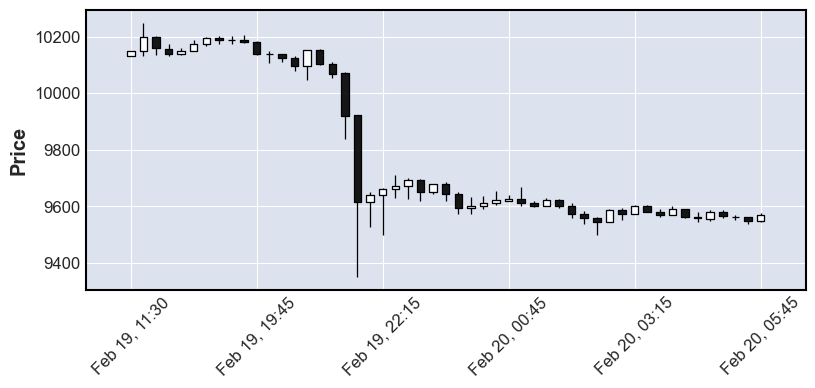

In [107]:
random_date = random.randint(0, len(list_validate_dates_bullishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bullishengulfing[random_date]))
idx = df.index.get_loc(list_validate_dates_bullishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

### Get the dates from the bearish candlesticks patterns

In [108]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['formatted_open_time'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['formatted_open_time'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_bearishengulfing = df[df['CDLENGULFINGBEARISH'] == -100]['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [109]:
print(f'BEFORE: number of shooting star:{len(list_dates_shootingstar)}')
print(f'BEFORE: number of hangingman:{len(list_dates_hangingman)}')
print(f'BEFORE: number of dark cloud cover:{len(list_dates_darkcloudcover)}')
print(f'BEFORE: number of evening star:{len(list_dates_eveningstar)}')
print(f'BEFORE: number of bearish engulfing:{len(list_dates_bearishengulfing)}')

BEFORE: number of shooting star:414
BEFORE: number of hangingman:1000
BEFORE: number of dark cloud cover:9
BEFORE: number of evening star:234
BEFORE: number of bearish engulfing:2687


#### Run the checks to identify the real candlesticks with reversal

In [110]:
list_validate_dates_shootingstar = []
list_new_sign_shootingstar = []
for date in list_dates_shootingstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_shootingstar.append(date)
        list_new_sign_shootingstar.append(-1)
    else:
        list_new_sign_shootingstar.append(0)                    

In [111]:
list_validate_dates_hangingman = []
list_new_sign_hangingman = []
for date in list_dates_hangingman:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_hangingman.append(date)
        list_new_sign_hangingman.append(-1)
    else:
        list_new_sign_hangingman.append(0)         

In [112]:
list_validate_dates_darkcloudcover = []
list_new_sign_darkcloudcover = []
for date in list_dates_darkcloudcover:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_darkcloudcover.append(date)
        list_new_sign_darkcloudcover.append(-1)
    else:
        list_new_sign_darkcloudcover.append(0)          

In [113]:
list_validate_dates_eveningstar = []
list_new_sign_eveningstar = []
for date in list_dates_eveningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_eveningstar.append(date)
        list_new_sign_eveningstar.append(-1)
    else:
        list_new_sign_eveningstar.append(0)         

In [114]:
list_validate_dates_bearishengulfing = []
list_new_sign_bearishengulfing = []
for date in list_dates_bearishengulfing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_bearishengulfing.append(date)
        list_new_sign_bearishengulfing.append(-1)
    else:
        list_new_sign_bearishengulfing.append(0)         

#### Get the amount of candlesticks patterns (after check)

In [115]:
print(f'AFTER: number of shooting star:{len(list_validate_dates_shootingstar)}')
print(f'AFTER: number of hangingman:{len(list_validate_dates_hangingman)}')
print(f'AFTER: number of dark cloud cover:{len(list_validate_dates_darkcloudcover)}')
print(f'AFTER: number of evening star:{len(list_validate_dates_eveningstar)}')
print(f'AFTER: number of bearish engulfoing:{len(list_validate_dates_bearishengulfing)}')

AFTER: number of shooting star:214
AFTER: number of hangingman:498
AFTER: number of dark cloud cover:4
AFTER: number of evening star:172
AFTER: number of bearish engulfoing:1416


### Plot some results

#### Shooting Star

27322


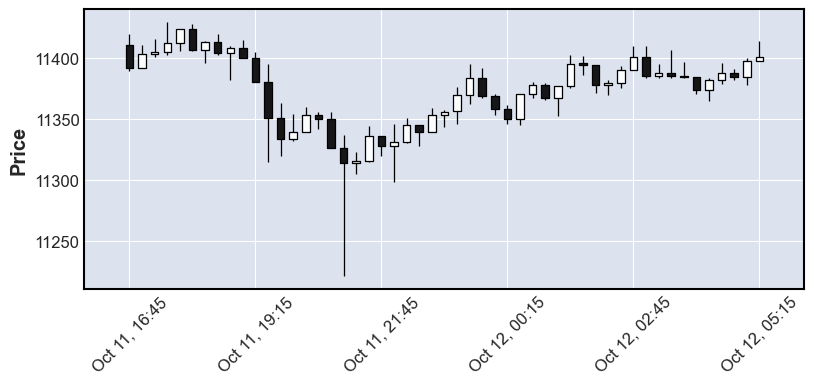

In [116]:
random_date = random.randint(0, len(list_validate_dates_shootingstar)-1)
print(df.index.get_loc(list_validate_dates_shootingstar[random_date]))
idx = df.index.get_loc(list_validate_dates_shootingstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Hangingman

20452


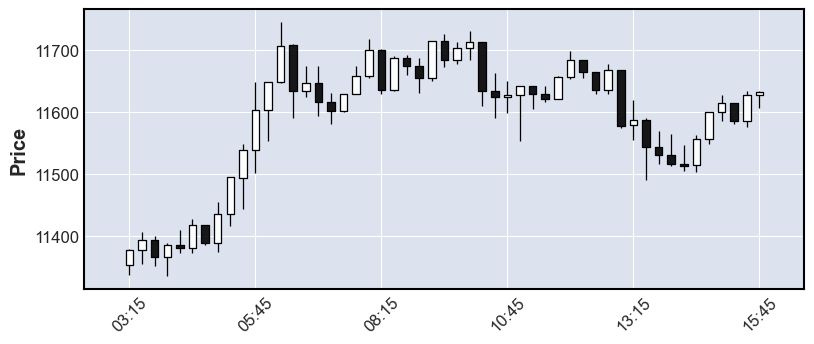

In [117]:
random_date = random.randint(0, len(list_validate_dates_hangingman)-1)
print(df.index.get_loc(list_validate_dates_hangingman[random_date]))
idx = df.index.get_loc(list_validate_dates_hangingman[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Dark Cloud Cover

32553


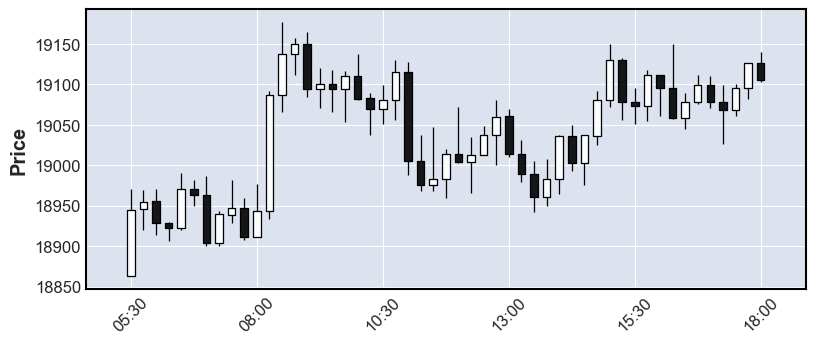

In [118]:
random_date = random.randint(0, len(list_validate_dates_darkcloudcover)-1)
print(df.index.get_loc(list_validate_dates_darkcloudcover[random_date]))
idx = df.index.get_loc(list_validate_dates_darkcloudcover[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Evening Star

25158


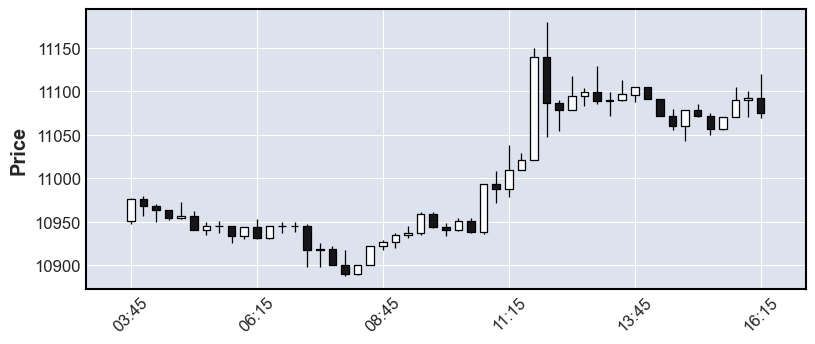

In [119]:
random_date = random.randint(0, len(list_validate_dates_eveningstar)-1)
print(df.index.get_loc(list_validate_dates_eveningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_eveningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Bearish Engulfing

28957


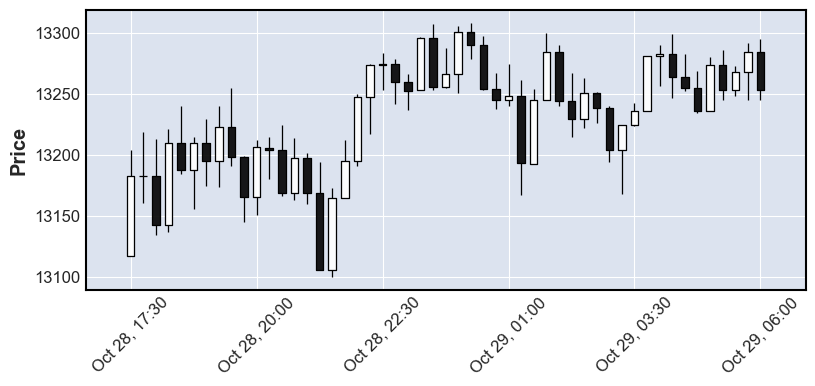

In [120]:
random_date = random.randint(0, len(list_validate_dates_bearishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bearishengulfing[random_date]))
idx = df.index.get_loc(list_validate_dates_bearishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Create the Data with the validation

In [121]:
# list_new_column_name = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW']
# list_of_list_valid_dates = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar]
# list_of_list_new_sign = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar]

list_new_column_name_pos = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLENGULFINGBULLISH_NEW']
list_new_column_name_neg = ['CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW', 'CDLENGULFINGBEARISH_NEW']

list_of_list_valid_dates_pos = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_bullishengulfing]
list_of_list_valid_dates_neg = [list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar, list_validate_dates_bearishengulfing]

In [122]:
df.shape

(69933, 28)

In [123]:
for i in range(0, len(list_new_column_name_pos)):
    df[list_new_column_name_pos[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_pos[i]), 1, 0)

In [124]:
for i in range(0, len(list_new_column_name_neg)):
    df[list_new_column_name_neg[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_neg[i]), -1, 0)

In [125]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1577836800000,7195.24,7196.25,7178.20,7180.97,202.942868,1577837699999,1.458245e+06,2452,76.962041,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:15:00,1577837700000,7180.97,7186.40,7175.47,7178.45,128.242654,1577838599999,9.207027e+05,1948,58.389110,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:30:00,1577838600000,7178.19,7185.44,7176.23,7179.56,83.487458,1577839499999,5.994792e+05,1580,43.822374,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:45:00,1577839500000,7179.35,7183.98,7175.46,7177.02,97.141921,1577840399999,6.974298e+05,1660,46.979601,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 01:00:00,1577840400000,7176.47,7194.04,7175.71,7190.86,103.520522,1577841299999,7.440891e+05,1588,56.251378,...,0,0,0,0,0,0,0,0,0,0


### Check

In [126]:
df[df['CDLENGULFINGBEARISH_NEW'] == -1]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 13:45:00,1577886300000,7228.00,7228.00,7216.00,7221.20,124.495490,1577887199999,8.992261e+05,1745,55.151789,...,0,0,0,0,0,0,0,0,0,-1
2020-01-01 17:30:00,1577899800000,7244.76,7244.97,7232.87,7233.00,130.031268,1577900699999,9.410902e+05,1488,68.160106,...,0,0,0,0,0,0,0,0,0,-1
2020-01-01 21:00:00,1577912400000,7237.26,7242.75,7228.00,7233.39,107.878779,1577913299999,7.806330e+05,1817,55.914288,...,0,0,0,0,0,0,0,0,0,-1
2020-01-02 01:00:00,1577926800000,7211.04,7211.16,7197.14,7197.86,90.554664,1577927699999,6.523442e+05,1434,34.093207,...,0,0,0,0,0,0,0,0,0,-1
2020-01-02 10:30:00,1577961000000,7177.24,7180.00,7161.88,7163.11,385.425463,1577961899999,2.762938e+06,3277,195.758417,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26 13:15:00,1640524500000,49891.11,49984.00,49791.48,49806.27,219.824290,1640525399999,1.096171e+07,7897,112.365060,...,0,0,0,0,0,0,0,0,0,-1
2021-12-27 16:00:00,1640620800000,51450.58,51519.97,51329.00,51372.89,453.403870,1640621699999,2.331453e+07,13407,295.514230,...,0,0,0,0,0,0,0,0,0,-1
2021-12-29 01:45:00,1640742300000,47858.95,47879.27,47691.76,47735.13,239.498650,1640743199999,1.145308e+07,7703,120.303380,...,0,0,0,0,0,0,0,0,0,-1


## Export the Data

### Export parameters

In [127]:
export_path = "../data"
export_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed"
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [128]:
df.to_csv(full_export_path, index=False)